<font size="4">Projet: Wonder Trade Analysis<br><br>
<font size="3">**Problématique:** Déterminer quel side gagne le plus, et les facteurs qui permettent ceci (Herald, Dragon)<br>
<font size="3">**Membre attitré:** Marien M.

<font color="lightblue">**Partie 01:** <font color="white">Importation(s)<br>
<font color="lightblue">**Objectif:** <font color="black">Installation des dépendances requises *(numpy et pandas)*

In [44]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

<font color="lightblue">**Partie 02:** <font color="black">Charger le fichier<br>
<font color="lightblue">**Objectif:** <font color="black">Mettre le fichier CSV danq une variable, pouvoir l'afficher  *(avec pandas)*

In [46]:
csv_file = 'lol_ranked_games.csv'
lol = pd.read_csv(csv_file)
lol

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [47]:
blue_wins = 0
red_wins = 0

<font color="lightblue">**Partie 03:** <font color="black">Détermination des victoires<br>
<font color="lightblue">**Objectif:** <font color="black">Pouvoir déterminer quel équipe (côté) gagne le plus

In [48]:
for winner in lol['winner']:
    if winner == 1:
        blue_wins += 1
    else:
        red_wins +=1 

In [49]:
total_games = blue_wins + red_wins

In [50]:
print("In the nitnth season of LOL, they were", total_games, "games in total.")

In the nitnth season of LOL, they were 51490 games in total.


In [51]:
print("The blue side (Team 1) won", blue_wins, "times, which is", round(blue_wins/total_games*100,2),"% of the total games.")
print("The red side (Team 2) won", red_wins, "times, which is", round(red_wins/total_games*100,2),"% of the total games.")

The blue side (Team 1) won 26077 times, which is 50.64 % of the total games.
The red side (Team 2) won 25413 times, which is 49.36 % of the total games.


In [52]:
win_data = pd.DataFrame({'winner': [blue_wins, red_wins]}, index=['Blue', 'Red'])

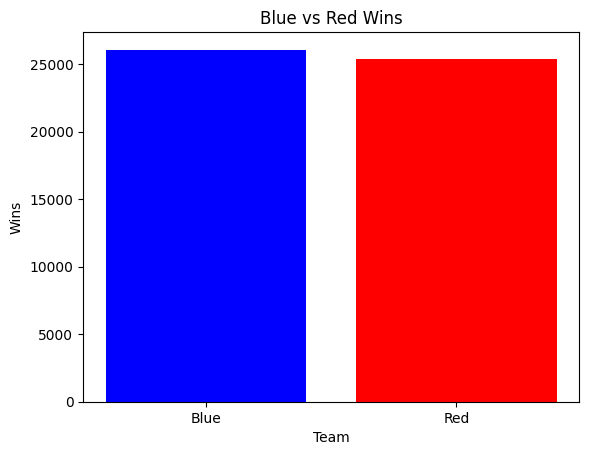

In [53]:
mpl.bar(['Blue', 'Red'], [blue_wins, red_wins], color=['blue', 'red'])
mpl.xlabel('Team')
mpl.ylabel('Wins')
mpl.title('Blue vs Red Wins')
mpl.show()

<font color="lightblue">**Partie 04:** <font color="black">Détermination (fateur de victoires)<br>
<font color="lightblue">**Objectif:** <font color="black">Permettre de déterminer ce que sont les facteurs de victoires, et si il y'en a, dire a quel point cela influence la victoire ou non

<font color="black">Herald

In [54]:
FHeraldBlue = 0
FHeraldRed =0
NoHerald = 0

In [55]:
for herald in lol['firstRiftHerald']:
    if  herald== 1:
        FHeraldBlue += 1
    elif herald == 2:
        FHeraldRed +=1
    else:
        NoHerald +=1

In [56]:
print ("In the span of", total_games, "games, the blue side took first herald", FHeraldBlue, "Times")

In the span of 51490 games, the blue side took first herald 12948 Times


In [57]:
print ("In the span of", total_games, "games, the red side took first herald", FHeraldRed, "Times")

In the span of 51490 games, the red side took first herald 12363 Times


In [58]:
print ("In contrary,over", total_games, "games, no one took the first herald", NoHerald, "Times")

In contrary,over 51490 games, no one took the first herald 26179 Times


In [59]:
blueW_with_herald = lol[(lol['firstRiftHerald'] == 1) & (lol['winner'] == 1)].shape[0]
redW_with_herald = lol[(lol['firstRiftHerald'] == 2) & (lol['winner'] == 2)].shape[0]
blueW_without_herald = lol[(lol['firstRiftHerald'] != 1) & (lol['winner'] == 1)].shape[0]
redW_without_herald = lol[(lol['firstRiftHerald'] != 2) & (lol['winner'] == 2)].shape[0]

In [62]:
labels = ['Blue wins with Herald', 'Red wins with Herald', 'Blue wins without Herald', 'Red wins without Herald']
sizes = [blueW_with_herald, redW_with_herald, blueW_without_herald, redW_without_herald]


(-1.0999998863860374,
 1.0999999674508418,
 -1.0999999139592913,
 1.0999999959028235)

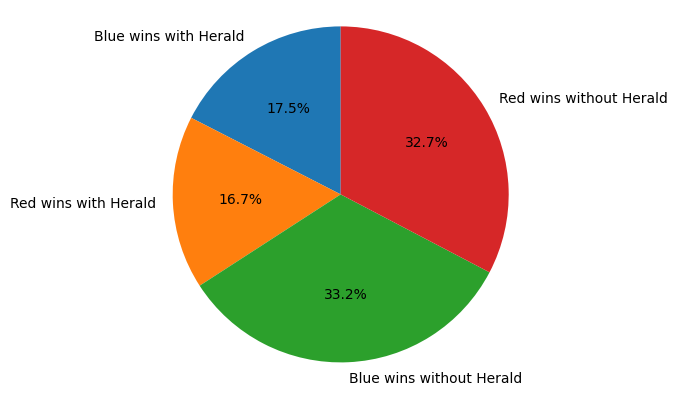

In [63]:
fig1, ax1 = mpl.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')